# Q2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt





def cuml_mean(arr : np.array):
  sum = np.cumsum(arr)
  t = 1
  mean_arr = np.array([])
  for i in range(sum.shape[0]):
    mean_arr = np.append(mean_arr, sum[i] / t)
    t += 1

  return mean_arr

def bern_mean(arr: np.array, factor):
  t = 0
  mean_arr = np.array([])
  for i in range(arr.shape[0]):

    if t == 0:
      result = (1 - factor) * arr[t]
    else:
      result = factor * mean_arr[t - 1] + (1 - factor) * arr[t]
    mean_arr = np.append(mean_arr, result)
    t += 1
  
  return mean_arr

def extend_bern_mean(arr: np.array, res_mean : np.array, factor):
  t = 0
  mean_arr = np.array([])
  for i in range(arr.shape[0]):
    if t == 0:
      result = 0
    else:
      result = res_mean[t] / (1 - (factor ** t))
    mean_arr = np.append(mean_arr, result)
    t += 1
  
  return mean_arr


array = np.ones((200, ))
array[100:] = np.full((100, ), -1) 

# print(cuml_mean(array))
# mean = bern_mean(array, 0.9)

# print(mean)
# print(extend_bern_mean(array, mean, 0.9))



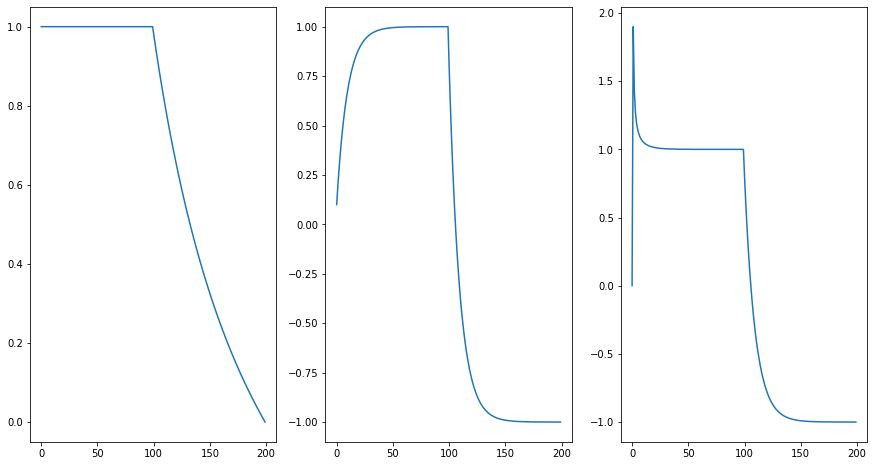

In [ ]:

cuml_means = cuml_mean(array)
bern_means = bern_mean(array, 0.9)
ext_bern_means = extend_bern_mean(array, bern_means, 0.9)

time = np.array([i for i in range(200)])

fig, axs = plt.subplots(1, 3, figsize=(15,8))
# fig.set_size_inches(18.5, 10.5)

axs[0].plot(cuml_means)
axs[1].plot(bern_means)
axs[2].plot(ext_bern_means)

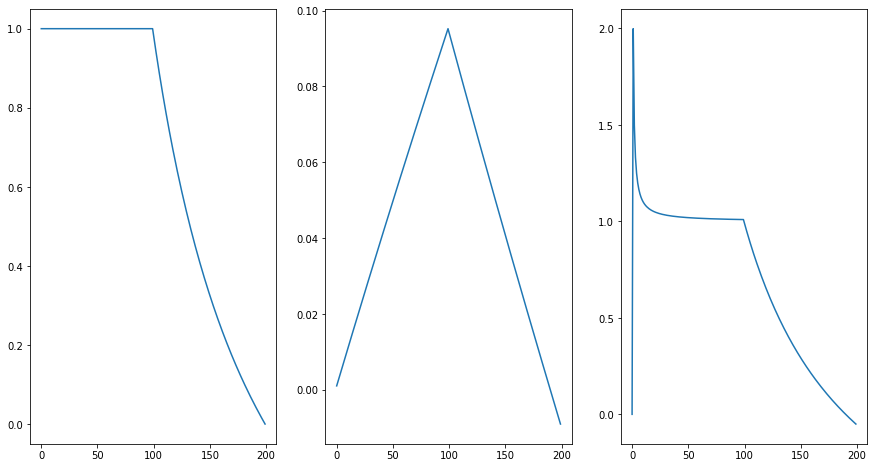

In [ ]:
cuml_means = cuml_mean(array)
bern_means = bern_mean(array, 0.999)
ext_bern_means = extend_bern_mean(array, bern_means, 0.999)

time = np.array([i for i in range(200)])

fig, axs = plt.subplots(1, 3, figsize=(15, 8))
# fig.set_size_inches(18.5, 10.5)

axs[0].plot(cuml_means)
axs[1].plot(bern_means)
axs[2].plot(ext_bern_means)

# Q3

In [3]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


#scale data
train_images = train_images / 255
test_images = test_images / 255

print(train_images.shape)



4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


let's print first 10 data


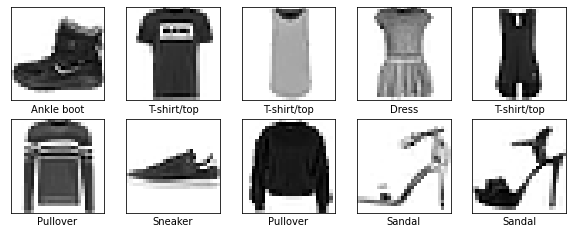

In [6]:


labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(labels[train_labels[i]])

plt.show()

In [7]:


def create_and_compiler_model(shape_of_intput, hiden_layer_size : int, output_layer_size : int, optimizer_method : str, 
                                metrics_list : list, loss_function : str, activation_function : str):
  
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=shape_of_intput),
      tf.keras.layers.Dense(hiden_layer_size, activation=activation_function),
      tf.keras.layers.Dense(output_layer_size, activation="sigmoid")
  ])

  model.compile(
      optimizer=optimizer_method,
      loss=loss_function,
      metrics=metrics_list
  )

  return model



In [9]:

import random

tf.random.set_seed(
    432
)
np.random.seed(412)

random.seed(538)

lr = 0.001
hidden_layers = [16, 32, 64, 128]

resultss = {}

for hidden_layer in hidden_layers:

  model = create_and_compiler_model(
      train_images.shape[1:],
      hidden_layer,
      len(labels),
      tf.keras.optimizers.SGD(learning_rate=lr),
      ["accuracy",],
      "sparse_categorical_crossentropy",
      "relu"
  )

  result = model.fit(train_images, train_labels, epochs=50, validation_split=0.15, verbose=0)
  resultss[hidden_layer] = (result.history["accuracy"], result.history["val_loss"], result, model)





16: acc: 0.8445686101913452 and val loss:0.4644750952720642
32: acc: 0.850882351398468 and val loss:0.44719934463500977
64: acc: 0.8545882105827332 and val loss:0.43930551409721375
128: acc: 0.8591960668563843 and val loss:0.42495107650756836
best result
128
0.42495107650756836


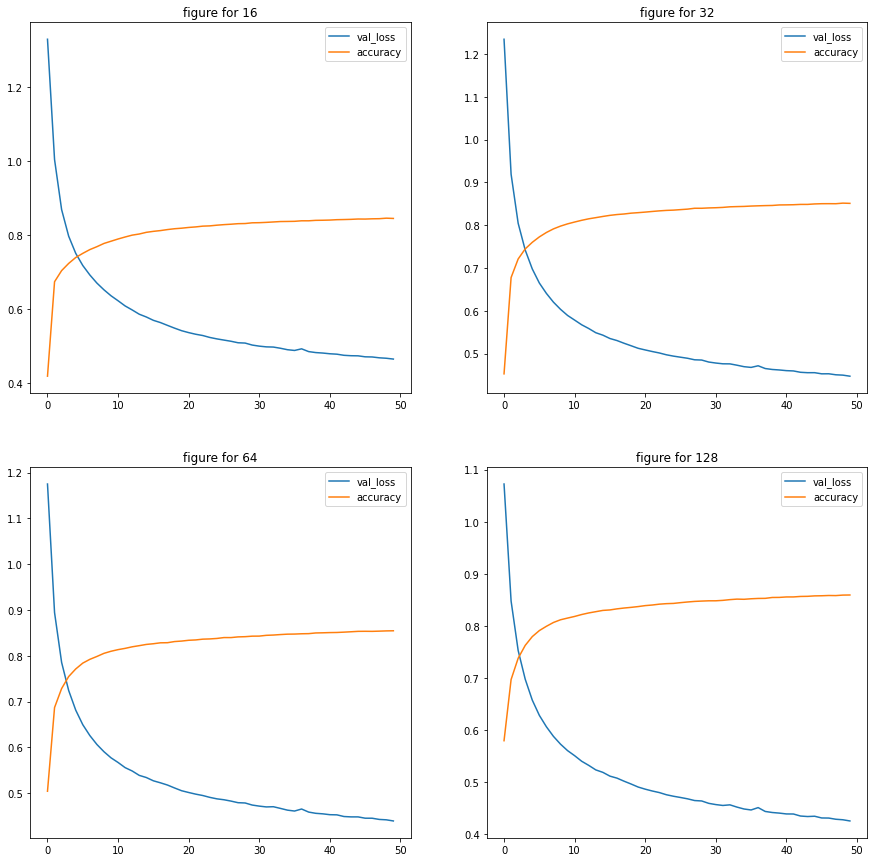

In [29]:
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(2, 2, figsize=(15,15))

# print(resultss)

i = 0
best_hidden_layer = -1
acc = -1
val_loss = 9999999

for key, value in resultss.items():
  axs[i // 2, i % 2].set_title("figure for " + str(key))
  axs[i // 2, i % 2].plot(value[1], label="val_loss")
  axs[i // 2, i % 2].plot(value[0], label="accuracy")
  axs[i // 2, i % 2].legend()
  print(str(key) + ": acc: " + str(value[0][-1]) + " and val loss:" + str(value[1][-1]))
  if val_loss > value[1][-1]:
    val_loss = value[1][-1]
    best_hidden_layer = key
  i += 1
  
print("best result")
print(best_hidden_layer)
print(val_loss)

In [14]:
lr = 0.001
hidden_layers = [16, 32, 64, 128]
validations = [0.15, 0.35, 0.55]

resultss_with_vald = {}

for hidden_layer in hidden_layers:
  for validation_split in validations:

    model = create_and_compiler_model(
        train_images.shape[1:],
        hidden_layer,
        len(labels),
        tf.keras.optimizers.SGD(learning_rate=lr),
        ["accuracy",],
        "sparse_categorical_crossentropy",
        "relu"
    )

    result = model.fit(train_images, train_labels, epochs=50, validation_split=validation_split, verbose=0)
    resultss_with_vald[(hidden_layer, validation_split)] = (result.history["accuracy"], result.history["val_loss"], result, model)



16 with validation 0.15: acc: 0.8469607830047607 and val loss:0.4571841359138489
16 with validation 0.35: acc: 0.8413076996803284 and val loss:0.47338244318962097
16 with validation 0.55: acc: 0.8349568247795105 and val loss:0.5036729574203491
---------------------------
32 with validation 0.15: acc: 0.8516470789909363 and val loss:0.4457932710647583
32 with validation 0.35: acc: 0.8479999899864197 and val loss:0.46085864305496216
32 with validation 0.55: acc: 0.8417719006538391 and val loss:0.48232364654541016
---------------------------
64 with validation 0.15: acc: 0.8542745113372803 and val loss:0.4350762665271759
64 with validation 0.35: acc: 0.8479230999946594 and val loss:0.45556509494781494
64 with validation 0.55: acc: 0.840290367603302 and val loss:0.4836328625679016
---------------------------
128 with validation 0.15: acc: 0.8572941422462463 and val loss:0.4296174943447113
128 with validation 0.35: acc: 0.852717936038971 and val loss:0.44915544986724854
128 with validation 

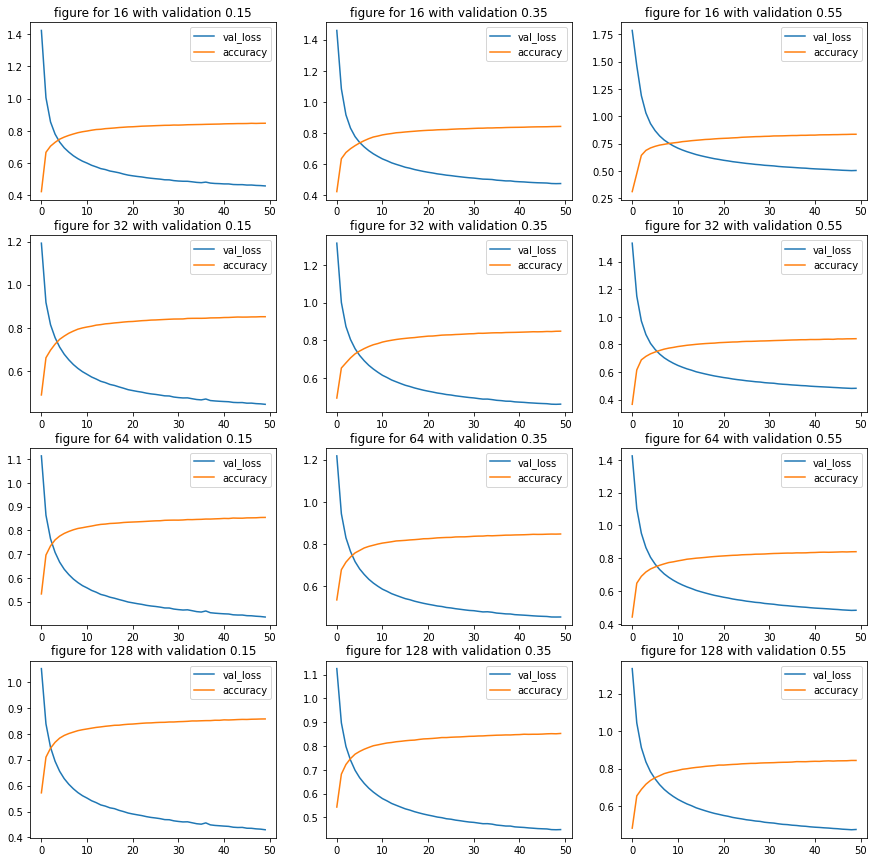

In [19]:
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(4, 3, figsize=(15,15))

# print(resultss)

i = 0
best_hidden_layer_with_validation = -1
acc = -1
val_loss_with_valid = 9999999

for key, value in resultss_with_vald.items():
  if i % 3 == 0 and i != 0:
    print("---------------------------")
  axs[i // 3, i % 3].set_title("figure for " + str(key[0]) + " with validation " + str(key[1]))
  axs[i // 3, i % 3].plot(value[1], label="val_loss")
  axs[i // 3, i % 3].plot(value[0], label="accuracy")
  axs[i // 3, i % 3].legend()
  print(str(key[0]) + " with validation " + str(key[1]) + ": acc: " + str(value[0][-1]) + " and val loss:" + str(value[1][-1]))
  if val_loss_with_valid > value[1][-1]:
    val_loss_with_valid = value[1][-1]
    best_hidden_layer_with_validation = key
  i += 1
  
print("best result")
print(best_hidden_layer_with_validation)
print(val_loss_with_valid)

let's examine on test dataset

In [ ]:


for key, value in resultss.items():
  test_loss, test_acc = value[3].evaluate(test_images,  test_labels, verbose=2)
  print(f"{key}: test_loss is {test_loss} and test_acc is {test_acc}")

313/313 - 0s - loss: 0.4877 - accuracy: 0.8300
16: test_loss is 0.4877307713031769 and test_acc is 0.8299999833106995
313/313 - 0s - loss: 0.4698 - accuracy: 0.8371
32: test_loss is 0.46984803676605225 and test_acc is 0.8371000289916992
313/313 - 0s - loss: 0.4601 - accuracy: 0.8395
64: test_loss is 0.46013134717941284 and test_acc is 0.8395000100135803
313/313 - 0s - loss: 0.4477 - accuracy: 0.8435
128: test_loss is 0.4477135241031647 and test_acc is 0.843500018119812
128
0.42495107650756836


let change optimizers

In [30]:

best_models_opt = {}

optimizers = [
              ("adam", tf.keras.optimizers.Adam(learning_rate=0.001)), 
              ("Adagrad", tf.keras.optimizers.Adagrad(learning_rate=0.001)), 
              ("RMSprop", tf.keras.optimizers.RMSprop(learning_rate=0.001))
]

for optimizer in optimizers:
  
  best_model = create_and_compiler_model(
        train_images.shape[1:],
        best_hidden_layer,
        len(labels),
        optimizer[1],
        ["accuracy",],
        "sparse_categorical_crossentropy",
        "relu"
    )
  

  result = best_model.fit(train_images, train_labels, epochs=50, validation_split=0.15, verbose=0)
  best_models_opt[optimizer[0]] = (result.history["accuracy"], result.history["val_loss"], result, best_model)


adam acc:0.9637843370437622val loss: 0.5032269954681396
Adagrad acc:0.854548990726471val loss: 0.4444107711315155
RMSprop acc:0.9516274333000183val loss: 0.854117214679718
adam
0.9637843370437622


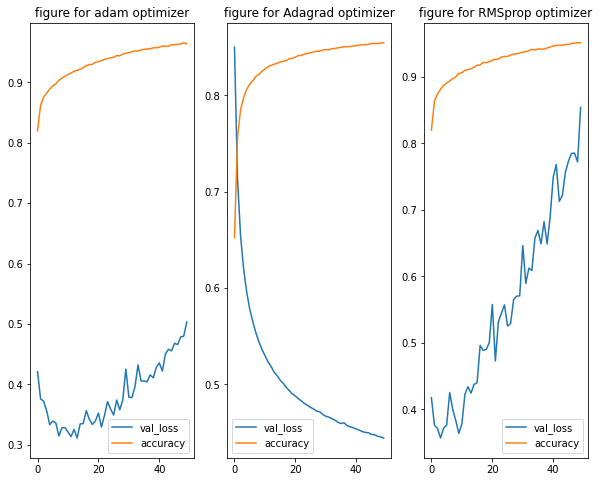

In [38]:
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(1, 3, figsize = (10, 8))

i = 0
best_hidden_layer_with_optimizer = ""
acc = -1

for key, value in best_models_opt.items():
  axs[i % 3].set_title("figure for " + str(key) + " optimizer")
  axs[i % 3].plot(value[1], label="val_loss")
  axs[i % 3].plot(value[0], label="accuracy")
  axs[i % 3].legend()
  print(str(key) + " acc:" + str(value[0][-1]) + "val loss: " + str(value[1][-1]))
  if value[0][-1] > acc:
    acc = value[0][-1]
    best_hidden_layer_with_optimizer = key
  i += 1
  

print(best_hidden_layer_with_optimizer)
print(acc)

In [ ]:
for key, value in best_models_opt.items():
  test_loss, test_acc = value[3].evaluate(test_images,  test_labels, verbose=2)
  print(f"{key}: test_loss is {test_loss} and test_acc is {test_acc}")

313/313 - 0s - loss: 0.5298 - accuracy: 0.8869
adam: test_loss is 0.5298075675964355 and test_acc is 0.886900007724762
313/313 - 0s - loss: 0.4605 - accuracy: 0.8417
Adagrad: test_loss is 0.46054771542549133 and test_acc is 0.84170001745224
313/313 - 0s - loss: 0.8232 - accuracy: 0.8766
RMSprop: test_loss is 0.8232148289680481 and test_acc is 0.8766000270843506


In [39]:


def get_optimizer_with_lr(optimizer_name, lr):
  if optimizer_name == "adam":
    return tf.keras.optimizers.Adam(learning_rate=lr)
  elif optimizer_name == "Adagrad":
    return tf.keras.optimizers.Adagrad(learning_rate=lr)
  elif optimizer_name == "RMSprop":
    return tf.keras.optimizers.RMSprop(learning_rate=lr)


learnings = [
    0.1,
    0.01,
    0.0001,
]

best_mode_with_best_opt_with_lr = {}


for lr in learnings:
  optimizer = get_optimizer_with_lr(best_hidden_layer_with_optimizer, lr)
  best_model_best_opt = create_and_compiler_model(
        train_images.shape[1:],
        best_hidden_layer,
        len(labels),
        optimizer,
        ["accuracy",],
        "sparse_categorical_crossentropy",
        "relu"
    )
  

  result = best_model_best_opt.fit(train_images, train_labels, epochs=50, validation_split=0.15, verbose=0)
  best_mode_with_best_opt_with_lr[lr] = (result.history["accuracy"], result.history["val_loss"], result, best_model_best_opt)


0.1 acc:0.2871372401714325val loss: 2.2418460845947266
0.01 acc:0.8844117522239685val loss: 0.5102272033691406
0.0001 acc:0.9261176586151123val loss: 0.3104964792728424
0.0001
0.9261176586151123


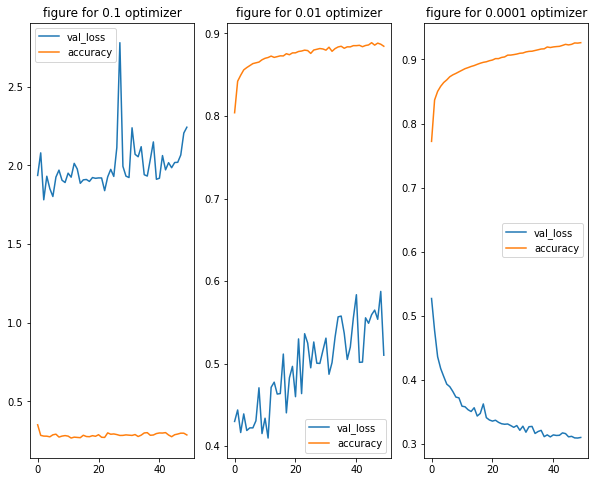

In [40]:
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(1, 3, figsize = (10, 8))

i = 0
best_hidden_layer_with_best_optimizer_lr = ""
acc = -1

for key, value in best_mode_with_best_opt_with_lr.items():
  axs[i % 3].set_title("figure for " + str(key) + " optimizer")
  axs[i % 3].plot(value[1], label="val_loss")
  axs[i % 3].plot(value[0], label="accuracy")
  axs[i % 3].legend()
  print(str(key) + " acc:" + str(value[0][-1]) + "val loss: " + str(value[1][-1]))
  if value[0][-1] > acc:
    acc = value[0][-1]
    best_hidden_layer_with_best_optimizer_lr = key
  i += 1
  

print(best_hidden_layer_with_best_optimizer_lr)
print(acc)

In [ ]:
for key, value in best_mode_with_best_opt_with_lr.items():
  test_loss, test_acc = value[3].evaluate(test_images,  test_labels, verbose=2)
  print(f"{key}: test_loss is {test_loss} and test_acc is {test_acc}")

313/313 - 0s - loss: 2.2824 - accuracy: 0.1159
0.1: test_loss is 2.282447576522827 and test_acc is 0.11590000241994858
313/313 - 0s - loss: 0.6204 - accuracy: 0.8554
0.01: test_loss is 0.6203922629356384 and test_acc is 0.855400025844574
313/313 - 0s - loss: 0.3328 - accuracy: 0.8835
0.0001: test_loss is 0.33275678753852844 and test_acc is 0.8834999799728394


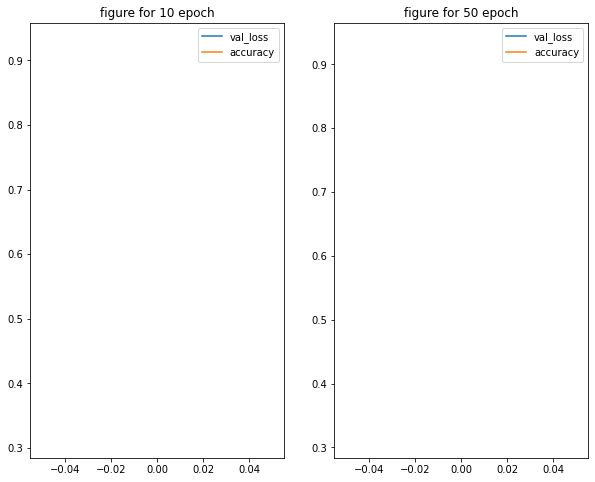

In [43]:
fig, axs = plt.subplots(1, 2, figsize = (10, 8))

model_10 = create_and_compiler_model(
    train_images.shape[1:],
    best_hidden_layer,
    len(labels),
    optimizer,
    ["accuracy",],
    "sparse_categorical_crossentropy",
    "relu"
)
  

result_10 = best_model_best_opt.fit(train_images, train_labels, epochs=10, validation_split=0.15, verbose=0)

model_50 = create_and_compiler_model(
    train_images.shape[1:],
    best_hidden_layer,
    len(labels),
    optimizer,
    ["accuracy",],
    "sparse_categorical_crossentropy",
    "relu"
)
result_50 = best_model_best_opt.fit(train_images, train_labels, epochs=50, validation_split=0.15, verbose=0)

# best_mode_with_best_opt_with_lr[lr] = (result.history["accuracy"], result.history["val_loss"], result, best_model_best_opt)

max acc for 10: 0.933078408241272
max acc for 50: 0.9576078653335571


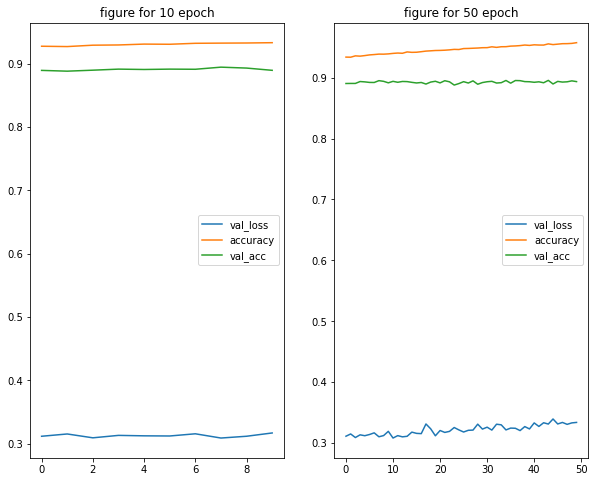

In [53]:
fig, axs = plt.subplots(1, 2, figsize = (10, 8))

print("max acc for 10: " + str(result_10.history["accuracy"][-1]))
print("max acc for 50: " + str(result_50.history["accuracy"][-1]))

axs[0].set_title("figure for 10 epoch")
axs[0].plot(result_10.history["val_loss"], label="val_loss")
axs[0].plot(result_10.history["accuracy"], label="accuracy")
axs[0].plot(result_10.history["val_accuracy"], label="val_acc")
axs[0].legend()



axs[1].set_title("figure for 50 epoch")
axs[1].plot(result_50.history["val_loss"], label="val_loss")
axs[1].plot(result_50.history["accuracy"], label="accuracy")
axs[1].plot(result_50.history["val_accuracy"], label="val_acc")
axs[1].legend()


In [54]:

eval_res = {}

for hidden_layer in hidden_layers:

  model = create_and_compiler_model(
      train_images.shape[1:],
      hidden_layer,
      len(labels),
      tf.keras.optimizers.SGD(learning_rate=lr),
      ["accuracy",],
      "sparse_categorical_crossentropy",
      "relu"
  )

  train_histo = model.fit(train_images, train_labels, epochs=50, validation_split=0.15, verbose=0)
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

  eval_res[hidden_layer] = (train_histo, test_loss, test_acc)

  

313/313 - 0s - loss: 0.7484 - accuracy: 0.7470
313/313 - 0s - loss: 0.6879 - accuracy: 0.7697
313/313 - 0s - loss: 0.7080 - accuracy: 0.7584
313/313 - 0s - loss: 0.6666 - accuracy: 0.7791


16: test acc: 0.746999979019165 test loss: 0.748390793800354
32: test acc: 0.7696999907493591 test loss: 0.6879454255104065
64: test acc: 0.758400022983551 test loss: 0.7080209255218506
128: test acc: 0.7791000008583069 test loss: 0.6666470766067505


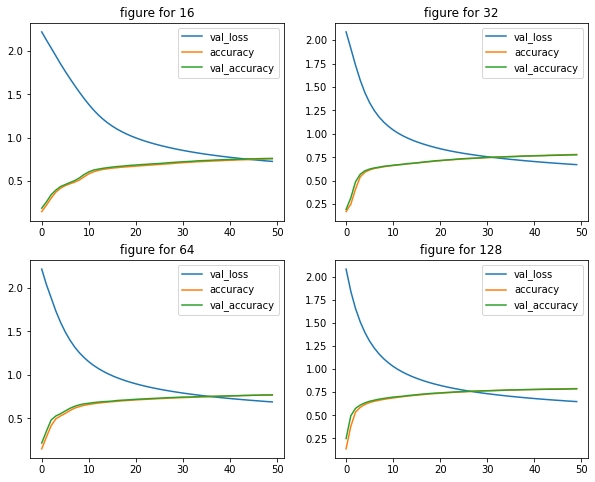

In [55]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))


i = 0
for key, value in eval_res.items():
  axs[i // 2, i % 2].set_title("figure for " + str(key))
  axs[i // 2, i % 2].plot(value[0].history['val_loss'], label="val_loss")
  axs[i // 2, i % 2].plot(value[0].history['accuracy'], label="accuracy")
  axs[i // 2, i % 2].plot(value[0].history['val_accuracy'], label="val_accuracy")
  axs[i // 2, i % 2].legend()

  print(str(key) + ": test acc: " + str(value[2]) + " test loss: " + str(value[1]))
  i += 1